In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 25 16:23:21 2018

@author: amitkumar_kataria
"""

import pandas as pd

#df = pd.DataFrame([12,3,4],[12,3,4])

# import cv2


##----- testing the class and private member functinality  in a class
#
#class myClass:
#    cls_var = 10
#    def __init__(self, name, game):
#        self.name = name
##        self.game = game
#        self.cls_var = game
#    @staticmethod    
#    def __provd():
#        print(' i ma teh provdferer ')
#        
#    def obj_method(self):
#        print(' callin theh provarte method ')
##        print(self.cls_var)
#        myClass.__provd()
#        
#fir = myClass('one', 1)
#sec = myClass('one', 2)
#
### - By default all the user defined objects are hashable
##print(hash(fir))
##print(hash(sec))
##
##obj_set = set([fir,sec])
##print(obj_set)
### ---- hash ends ----->>>>>>>>>>
#
#print( fir.name)
#print(fir.cls_var)
#print(myClass.cls_var)
#myClass._myClass__provd()
#myClass.obj_method('fdfdf' )
#fir.obj_method()

        
# ---------------  Ends here
        

## ----------------------- open the image using opencv--------
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#import os 

#path = os.path('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\4.jpg')


img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\1.jpg',-1)
#img = cv.imread(path,0)
print(img)
print(img.shape)
print(type(img))
cv.namedWindow('image', cv.WINDOW_NORMAL)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

plt.imshow(img)
plt.show()

#---------------- capturing video with opencv--------
cap = cv.VideoCapture()
#while True:
#    ret, frame = cap.read()
    
    
#-------------- DRAWING ITHE SHAPES ----------

# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.circle(img,(447,63), 63, (0,0,255), 0)
cv.ellipse(img,(256,256),(50,50),100,10,330,100,20)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],False,(0,255,255))
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 2,(255,255,255),2,cv.LINE_AA)

cv.circle(img,(200,200), 30, (0,0,255), 0)
cv.circle(img,(180,263), 30, (0,255,0), 0)
cv.circle(img,(250,263), 30, (255,0,0), 0)


##---------  opencv ends >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>



None


AttributeError: 'NoneType' object has no attribute 'shape'

### Part II GUI Features in OpenCV

In [16]:
#---------------  dRAWING IMAGES ON MOUSE EVENT ----------

import numpy as np
import cv2 as cv
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        cv.circle(img,(x,y),100,(255,0,0),-1)
# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    if cv.waitKey(20) & 0xFF == 27:
        break
cv.destroyAllWindows()

In [15]:



#------------  mouse callback setup - second example-----
import numpy as np
import cv2 as cv
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv.circle(img,(x,y),5,(0,0,255),-1)
            
img = np.zeros((512,512,3), np.uint8)
cv.namedWindow('image')
cv.setMouseCallback('image',draw_circle)
while(1):
    cv.imshow('image',img)
    k = cv.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv.destroyAllWindows()

In [13]:
#displaying the video caputure using the webcam

import numpy as np
import cv2
cap = cv2.VideoCapture(0)
 
while(True):
# Capture frame-by-frame
    ret, frame = cap.read()
# Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
 
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [12]:
#playing a viedo from file

cap = cv2.VideoCapture('/home/amit/Videos/OOPAR OOPAR RENN DE _ The Bro Anthem _ Happii-Fi-O9qaUEaKUeU.webm')

while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [14]:
#Capturing and saving a fliped (upside-Down) video using webcam

import numpy as np
import cv2
cap = cv2.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
# write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

#### Tracker example with the provide assignment

In [4]:
# Trackbar example

import cv2
import numpy as np
def nothing(x):
    pass 

b = 255
g = 0
r = 0
# radius = 10

def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(244,151),radius,(b,g,r),-1)
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)


# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
 
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
cv2.createTrackbar('Radius', 'image',10,100,nothing)


while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

# get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    radius = cv2.getTrackbarPos('Radius','image')
    
    s = cv2.getTrackbarPos(switch,'image')
 
    if s == 0:
        img[:] = 0
#     else:
#         img[:] = [b,g,r]
#         cv2.setMouseCallback('image',draw_circle)

        
cv2.destroyAllWindows()

### Part III   CORE OPERATIONS

#### --- 3.1 BASIC OPERATION ON IMAGES---------------------

In [ ]:


import numpy as np
import cv2 as cv

messi = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',-1)
print(messi.shape)
px = messi[100,100]
print(px)

#accessing the blue Pixel
blue = messi[...,0]
green = messi[...,1]
red = messi[...,2]

print(blue.shape)
messi[193,258] = [0,0,0]
cv.imshow('blue_pixels', messi)
#cv.imshow('read_messi', messi)
cv.waitKey(000)
cv.destroyAllWindows()

print(messi.item((10,10,2)))
messi.itemset((10,10,2),0)
print(messi.item((10,10,2)))

# Accessing Image Properties
print(messi.ndim)  # same as print(len(pic.shape))
print(messi.shape)
print(messi.size)
print(messi.dtype)

# Image ROI
'''
you will have to play with certain region of images
'''
# REplaceing the second ball with grass
#ball = messi[210:270,330:390]
#print(ball.shape)
#print(ball[0:1,...].shape)
#messi[273:333, 100:160]= ball[0:1,...]
#print(messi[280:340,330:390].shape)
cv.circle(messi,(103,240),30,(18,63,25),-1)
#print(tuple(messi[190,240]))
cv.imshow('read_messi', messi)
cv.waitKey(000)
cv.destroyAllWindows()












In [ ]:
## Making Borders for Images (Padding)
'''
If you want to create a border around the image, something like a photo frame,
you can use cv.copyMakeBorder(). But it has more applications for convolution 
operation, zero padding etc.
'''
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
RED = [255,0,0]
WHITE = [255,255,255]
img1 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\2.jpg',-1)
replicate = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=WHITE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

## 3.2 Arithmetic Operations on Images

In [ ]:

'''
 cv.add(), cv.addWeighted() etc
'''

x = np.uint8([250])
y = np.uint8([10])
print(cv.add(x,y))  # 250+10 = 260 ==> 255
print(x+y)  # 250+10 = 260 ==> 4

# Image Blending
img1  = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',-1)
img2  = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\opencv_logo.png',-1)

print(img1.shape)
print(img2.shape)

## Observe the difference between cv.add and numpy add of the pixels
img3 = img1[26:250,60:284,]+img2
cv.imshow("Blended image" , img3)
cv.waitKey(5000);
cv.destroyAllWindows()
cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Blend_open_messi_image.jpg',img3)

img4 = cv.add(img1[26:250,60:284,],img2)
cv.imshow("Blended image" , img4)
cv.waitKey(5000);
cv.destroyAllWindows()
cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Blend_open_messi.jpg',img4)

## Image Bleinging
img4 = cv.addWeighted(img1[26:250,60:284,],0.8,img2,0.3,-10)
cv.imshow("Blended image" , img4)
cv.waitKey(10000);
cv.destroyAllWindows()
cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Blend_open_messi_blended.jpg',img4)

## Bitwise Operations
'''
This includes bitwise AND, OR, NOT and XOR operations.
 They will be highly useful while extracting any part of the image
 (as we will see in coming chapters), 
 defining and working with non-rectangular ROI
'''
# Load two images
messi = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
logo = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\opencv_logo.png')
#logo = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\opencv_logo_black.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = logo.shape
roi = messi[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
logo2gray = cv.cvtColor(logo,cv.COLOR_BGR2GRAY)
#print(logo2gray)
ret, mask = cv.threshold(logo2gray, 150,maxval=255, type=cv.THRESH_BINARY)
#print(ret)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask)
#messi[0:rows, 0:cols ] = img1_bg
# Take only region of logo from logo image.
logo2_fg = cv.bitwise_and(logo,logo,mask = mask_inv)
#cv.imshow('blackout',logo2_fg)
#cv.waitKey(0)
#cv.destroyAllWindows()
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,logo2_fg)
messi[0:rows, 0:cols ] = dst
cv.imshow('res',messi)
cv.waitKey(0)
cv.destroyAllWindows()

## Assignment
img1  = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',-1)
img2  = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\opencv_logo_black.png',-1)


for percent in range(10,100,10):
    print(percent/100)
    image = cv.addWeighted(img1[26:225,60:260,], percent/100, img2, 1-percent/10,0)
    cv.imshow('res',image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\slides\\{0}.jpg'.format(str(percent//10)),image)

## Part IV Image Processing in OpenCv

#### 4.1 Changing Colorspaces

In [ ]:
 

'''
Flags for color converion in OpenCV
'''
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(len(flags))

'''
This is the simplest method in object tracking. 
Once you learn functions of contours, you can do plenty of things 
like find centroid of this object and use it to track the object, 
draw diagrams just by moving your hand in front of camera and 
many other funny stuffs.
'''
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print( hsv_green )



#### 4.2  Geometric Transformations of Images

In [ ]:


# Scaling - resize() shirnk or englarge the image
import numpy as np
import cv2 as cv
img  = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',-1)
res = cv.resize(img,None,fx=4, fy=4, interpolation = cv.INTER_CUBIC)
cv.imshow('result',res)
cv.waitKey(0)
cv.destroyAllWindows()
#OR
height, width, _ = img.shape
# when the size of output image is provide fx and fy are calculated from there
res = cv.resize(img,None,fx=1.4, fy=0.8, interpolation = cv.INTER_AREA)
#res = cv.resize(img,None, cv.Size(),0.5,0.5, interpolation = cv.INTER_AREA)
cv.imshow('result',res)
cv.waitKey(0)
cv.destroyAllWindows()

# tRANSLATION cv.wrapAffine() takes 2x3 matrix cv.wrapPerspective takes 3x3 matrix
import numpy as np
import cv2 as cv
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)

rows,cols = img.shape

#creating the matrix for inputted to be wrapAffine()
M = np.float32([[1,0,100],[0,1,50]])

# last argumnent for wrapAfine is size of destination image in widhtxheight
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

# Rotation with 90 degrees and no scaling

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)
rows,cols = img.shape

M = cv.getRotationMatrix2D(center= (cols/2,rows/2), angle= 270,scale=2)
#M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
dest = cv.warpAffine(src=img,M=M,dsize=(rows*2,cols))
dst = cv.warpAffine(dest,np.float32([[1,0,100],[0,1,10]]),dsize=(rows*2,cols))
cv.imshow('Result',dst)
cv.waitKey(0)
cv.destroyAllWindows()



#### 4.3 Image Thresholding : cv.threshold, cv.adaptiveThreshold 

In [ ]:


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\gradient.jpg',0)
ret,thresh1 = cv.threshold(img,200,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,200,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,200,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,200,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,200,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='cool')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Adaptive thresholding 
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\sudoku.jpg',0)
#img = cv.resize(img,None, fx=0.5,fy=0.5, interpolation = cv.INTER_AREA)
#img = cv.medianBlur(img,5)
cv.imshow('Result',img)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\sudoku.jpg',img)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# OTsu's Binarization

img = np.zeros((400,400,3), np.uint8)
cv.rectangle(img,(200,100),(300,200),(255,255,255),100)
cv.imshow('Result',img)
cv.waitKey(0)
cv.destroyAllWindows()


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\noisy2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# implementation of OSTu's Binarization
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\noisy2.png',0)
blur = cv.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )


#### 4.4 Smoothing Images 

In [ ]:

'''
Blur the images with various low pass filters
Apply custom made filters to images

Images can also be filtered with various low-pass filters(LPF), 
high-pass filters (HPF) etc. 

LPF helps in removing noises,  bluring the images etc
HPF helps in finding edges in images.
'''
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\opencv_logo_black.png')
kernel = np.ones((5,5), np.float32)/25
# obser the bluring with different size of the filters
#kernel = np.ones((5,6), np.float32)/30
#kernel = np.ones((10,10), np.float32)/100
#dst = cv.filter2D(img, ddepth=-1, kernel=kernel)
dst = cv.filter2D(img, -1, kernel)
plt.subplot(121); plt.imshow(img), plt.title('Original')
plt.xticks([]);plt.yticks([])
plt.subplot(122);plt.imshow(dst);plt.title('Averaging kerneled')
plt.xticks([]);plt.yticks([])

'''
Image blurring is achieved by convolving the image with a low-pass filter 
kernel. It is useful for removing noises. It actually removes high frequency 
content (eg: noise, edges) from the image. So edges are blurred a little bit 
in this operation.

OpenCV provides mainly four types of blurring techniques
Average Bluring      cv.blur() or cv.boxFilter()
Gaussian Bluring     cv.GaussianBlur(img, (x,y),0)
Medina Bluring       cv.medianBlur(img, 5)
Bilateral Bluring    cv.bilateralFilter(img,9,75,75)
'''
#img = cv.imread('opencv-logo-white.png')
blur = cv.blur(img,(5,5))
box = cv.boxFilter(img,-1, (3,3), normalize=False)
titles = ['Original','Blurred','Box filtered']
images = [img, blur, box]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i]),plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(211),plt.imshow(box),plt.title('Box filtered')
plt.xticks([]), plt.yticks([])
plt.show()

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
#img = cv.add(img, cv.medianBlur(img,2))
median_blur = cv.medianBlur(img,1)

#f = plt.figure(figsize=(10,3))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median_blur),plt.title('Median Blurred')
plt.xticks([]), plt.yticks([])

#plt.imshow(img)
cv.imshow('  ',median_blur)
cv.waitKey(0)
cv.destroyAllWindows()

#bilateraled =  cv.bilateralFilter(img,9,175,175)
#cv.imshow('  ',bilateraled)
#cv.waitKey(0)
#cv.destroyAllWindows()



####  Morphological Transformations

In [ ]:

'''
We will see different functions like : cv.erode(), cv.dilate(), cv.morphologyEx() etc.

It is normally performed on binary images. It needs two inputs, 
one is our original image, second one is called structuring element or kernel 
which decides the nature of operation.
'''
import numpy as np
import cv2 as cv
img = cv.imread('You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.

kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(img, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(erosion),plt.title('Erored')
#plt.imshow(erosion)
# Rectangular Kernel
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
ellipse_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
#kernel = np.ones((5,5), np.uint8)
dilate_rect = cv.dilate(img, rect_kernel)
dilate_ellip = cv.dilate(img, ellipse_kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(dilate_rect),plt.title('Dilated  using Rectangle kernel')
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(dilate_ellip),plt.title('Dilated using ellipse kernel')

kernel = np.ones((5,5), np.uint8)
morph_open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(morph_open),plt.title('Morph open')

kernel = np.ones((5,5), np.uint8)
morph_close = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(morph_close),plt.title('Morph close')

kernel = np.ones((5,5), np.uint8)
morph_grade = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(morph_grade),plt.title('Morph Gradient')




#### Image Gradients

In [ ]:

'''
OpenCV provides three types of gradient filters or
 High-pass filters, Sobel, Scharr and Laplacian.
'''
## Sobel
'''
You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.
'''
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\sudoku.jpg',0)
#gaus = cv.GaussianBlur(img, (5,5), 0)
#plt.imshow(gaus, cmap='gray')

lapcian = cv.Laplacian(img, cv.CV_64F)
sobel_x = cv.Sobel(img, cv.CV_64F,1,0, ksize=5)
sobel_y = cv.Sobel(img, cv.CV_64F,0,1, ksize=5)

plt.subplot(2,2,1),plt.imshow(lapcian, cmap='gray'),plt.title('Lapcian')
plt.subplot(2,2,2),plt.imshow(sobel_x, cmap='gray'),plt.title('Sobel_X')
plt.subplot(2,2,3),plt.imshow(sobel_y, cmap='gray'),plt.title('Sobel_Y')
plt.subplot(2,2,4),plt.imshow(img, cmap='gray'),plt.title('Original')



## ******** CANNY EDGE DETECTION *******************

In [ ]:
'''
Four stages to the algorithm:
    1. Noise reduction using Low pass filter lieg gaussianBlur( (5,5))
    2. finding intensity gradient using High pass filter like Sobel()
    3. Non- maximum suppresion, using the gradient magnitude and direction, 
        a full scan of image is done to remove any unwanted pixels 
        which may not constitute the edge. 
        
        ** Each pixel is check for a local maxima in its neighborhood in the
            direction of gradient, it is is a local maxima, it is considered
            for the next stage, otherwise suppresed to 0
    4. **Hysteresis Thresholding** we need two threshold values, minVal and 
        maxVal. Any edges with intensity gradient more than maxVal are sure 
        to be edges and those below minVal are sure to be non-edges, 
        so discarded. Those who lie between these two thresholds are 
        classified edges or non-edges based on their connectivity. 
        If they are connected to "sure-edge" pixels, they are considered 
        to be part of edges. Otherwise, they are also discarded
        
'''
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')

edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap='gray'), plt.title("Messi Original")
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap='gray'), plt.title("edges using canny")
plt.xticks([]),plt.yticks([])
plt.show()


cv.imshow("Messi original",img)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imshow("edges using canny",edges)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi_canny_edge.jpg',edges)




#### 4.6 Image Pyramids

In [ ]:
'''
set of the same image with different resolutions are calle image pyramids  
There are two kinds of Image Pyramids. 
    1) Gaussian Pyramid and 
    2) Laplacian Pyramids
'''

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
lower_reso = cv.pyrDown(img)
print(lower_reso.shape)
cv.imshow("Pyramid Down ", lower_reso)
cv.waitKey(0)
cv.destroyAllWindows()

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
higher_reso = cv.pyrUp(img)
print(higher_reso.shape)
cv.imshow("Pyramid Up ", higher_reso)
cv.waitKey(0)
cv.destroyAllWindows()

higher_reso2 = cv.pyrUp(higher_reso)
print(higher_reso2.shape)
cv.imshow("Pyramid Up 2 ", higher_reso2)
cv.waitKey(0)
cv.destroyAllWindows()


## 4.7 CONTOURS

#### 4.7.1 CONTOURS - Getting Started

In [ ]:
'''
You will see these functions : cv.findContours(), cv.drawContours()

Contours can be explained simply as a curve joining all the continuous points 
(along the boundary), having same color or intensity. 
The contours are a useful tool for shape analysis and object detection and recognition.
'''

import numpy as np
import cv2 as cv
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.imshow(im2, cmap='gray')
cv.imshow("Messig contoured", im2)
cv.waitKey(0)
cv.destroyAllWindows()

cv.drawContours(img, contours, -1,(0,255,0),2)
cv.imshow("Draw contour", img)
cv.waitKey(0)
cv.destroyAllWindows()

# to draw an individual contour, say 4th contour:
cv.drawContours(img, contours,3, (255,0,0),3)
cv.imshow("Draw contour", img)
cv.waitKey(0)
cv.destroyAllWindows()

cnt = contours[200]
cv.drawContours(img, [cnt],0, (0,0,255),2)
cv.imshow("Draw contour", img)
cv.waitKey(0)
cv.destroyAllWindows()



In [1]:
#### 4.7.2 Moments

In [ ]:


import numpy as np
import cv2 as cv
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)
ret,thresh = cv.threshold(img,127,255,0)
im2,contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[00]
M = cv.moments(cnt)
print( M )

area = cv.contourArea(contours[100])
print(area)
perimeter = cv.arcLength(contours[100],False)
print(perimeter)


#### Date 9-MAY-2018
##### 4.7.3

In [ ]:
'''
Contour : More Functions
'''

import cv2 as cv
import numpy as np

star = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\star.jpg')
star_gray = cv.cvtColor(star,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(star_gray,127, 200, 0)
#cv.imshow('Start threshold', thresh)
#cv.waitKey(0)
#cv.destroyAllWindows()

img, contours, hierarchy = cv.findContours(thresh ,2,1)
cnt = contours[0]
hull = cv.convexHull(cnt, returnPoints = False)
defects = cv.convexityDefects(cnt,hull)

for i in range(1):#defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(star,start,end,[0,255,0],2)
    cv.circle(star,far,5,[0,0,255],2)
cv.imshow('img',star)
cv.waitKey(0)
cv.destroyAllWindows()


dist = cv.pointPolygonTest(cnt,(50,50),True)
print(dist)
dist = cv.pointPolygonTest(cnt,(50,50),False)
print(dist)

'''
 a function cv.matchShapes() which enables us to compare two shapes, 
 or two contours and returns a metric showing the similarity. 
 The lower the result, the better match it is. It is calculated based on the 
 hu-moment values
'''

star = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\star.jpg')
star2 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\star2.png')

star_gray = cv.cvtColor(star, cv.COLOR_BGR2GRAY)
star2_gray = cv.cvtColor(star2, cv.COLOR_BGR2GRAY)

ret,thresh = cv.threshold(star_gray, 127,255,0)
ret2,thresh2 = cv.threshold(star2_gray, 127,255,0)

im2, contours, hierachy = cv.findContours(thresh, 2, 1)
cnt = contours[0]
im2, contours, hierachy = cv.findContours(thresh2, 2, 1)
cnt2 = contours[0]

ret = cv.matchShapes(cnt, cnt2,1,0.0)
print(ret)

cv.imshow('fd',cv.bitwise_and(im2,star2_gray, mask = star2_gray))
cv.waitKey(0)
cv.destroyAllWindows()



#### 4.7.5  Contours Hierarchy

In [ ]:

'''
cv.findContours() returns the output, we got three arrays, 
first is the image, 
second is our contours, 
and one more output which we named as hierarchy 
'''
cv.findContours()


## 4.8 HISTOGRAMS 
#### 4.8.1  Histograms - 1 : Find, Plot, Analyze !!!

In [ ]:

'''
 You can consider histogram as a graph or plot, which gives you an 
 overall idea about the intensity distribution of an image. It is a plot 
 with pixel values (ranging from 0 to 255, not always) in X-axis and 
 corresponding number of pixels in the image on Y-axis
 
 By looking at the histogram of an image, you get intuition about contrast, 
 brightness, intensity distribution etc of that image.
'''

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('home.jpg',0)
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('home.jpg')
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

#img = cv.imread('home.jpg',0)
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()




#### 4.8.2 Histogram Equalization:

In [ ]:

'''
why :  normally improves the contrast of the image. 
The method is useful in images with backgrounds and foregrounds that are 
both bright or both dark. In particular, the method can lead to better views 
of bone structure in x-ray images, and to better detail in photographs that 
are over or under-exposed

A disadvantage of the method is that it is indiscriminate. 
It may increase the contrast of background noise, while decreasing 
the usable signal.
'''

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Unequalized_Hawkes.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

'''
 we need a transformation function which maps the input pixels in 
 brighter region to output pixels in full region.
'''

cdf_m = np.ma.masked_equal(cdf, 0)
'''
 For masked array, all operations are performed on non-masked elements.
'''
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.imshow(img2,cmap='gray')

hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Histogram equalization in openCV using cv.equalizeHist()
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Unequalized_Hawkes.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res,cmap='gray', shape=(15,15))
'''
Histogram equalization is good when histogram of the image is confined to a 
particular region. It won't work good in places where there is large 
intensity variations where histogram covers a large region, ie both bright 
and dark pixels are present.
'''
#cv.imwrite('res.png',res)



### CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [ ]:


import numpy as np
import cv2 as cv
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\tsikba.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray')
plt.imshow(img,cmap='gray')
#cv.imwrite('clahe_2.jpg',cl1)

#### Date 10-MAY-2018
#### 4.8.3   2D Histogram 

In [ ]:
'''
calculated using the same function, cv.calcHist(). 
For color histograms, we need to convert the image from BGR to HSV. 
(Remember, for 1D histogram, we converted from BGR to Grayscale).
'''
import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hist = cv.calcHist(img_hsv, [0,1], None, [180,255], [0,180,0,255])
cv.imshow
cv.imshow('yui[', hist)
cv.waitKey(0)
cv.destroyAllWindows()
plt.imshow(hist,cmap='gray')
plt.legend()

## 2D Histogram in numpy

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hist, xbins, ybins = np.histogram2d(hsv[...,0].ravel(), hsv[...,1].ravel(),[180,256], [[0,180],[0,256]])
plt.imshow(hist, interpolation = 'nearest',cmap='gray')
plt.show()


#### 4.8.4 Histogram Backprojection

In [ ]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

target = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
hsvt = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# calculating object histogram
roihist = cv.calcHist([hsv[20:80,220:270,]],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram and apply backprojection
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)#, mask = hsv[60:80,200:240,])
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv.threshold(dst,20,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(target,thresh)

res = np.vstack((target,thresh,res))
cv.imwrite('res2.jpg',res)

#hsv[60:80,200:240,]
cv.rectangle(img, (20,220), (80,270),(0,0,255), 0)
cv.imshow('fdfd',disc)
cv.waitKey(0)
cv.destroyAllWindows()

## Fourier Transform

In [ ]:
`'''
WHY :   is used to analyze the frequency characteristics of various filters. 
For images, 2D Discrete Fourier Transform (DFT) is used to find 
the frequency domain.

You can consider an image as a signal which is sampled in two directions. 
So taking fourier transform in both X and Y directions gives you the frequency
representation of image.

So we can say, edges and noises are high frequency contents in an image. If 
there is no much changes in amplitude, it is a low frequency component. 
'''
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)
# Find the fouriest transfprm 
f = np.fft.fft2(img)
#zero frequency component (DC component) will be at top left corner. 
#If you want to bring it to center, 
#you need to shift the result by N2 in both the directions
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img,cmap='gray'), plt.title('Input Image')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.xticks([]),plt.yticks([])
plt.show()

'''
Now you can do some operations in frequency domain, 
like high pass filtering and reconstruct the image, ie find inverse DFT. 
For that you simply remove the low frequencies by masking with a 
rectangular window of size 60x60. 
Then apply the inverse shift using np.fft.ifftshift() 
so that DC component again come at the top-left corner. 
Then find inverse FFT using np.ifft2() function. 
The result, again, will be a complex number. 
You can take its absolute value.
'''

rows, cols = img.shape
crow, ccol = rows//2, cols//2  
fshift[crow-30 : crow+30, ccol-30:ccol+30] = 0 #It is a mask

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(111), plt.imshow(img_back,cmap='gray'),plt.title('Image after HPf')
plt.xticks([]),plt.yticks([])
plt.subplot(111), plt.imshow(img_back),plt.title('result in JET')
plt.xticks([]),plt.yticks([])
plt.show()

## Fourier Transformation in OpenCV cv.dft() cv.idft()

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)

dft = cv.dft(np.float32(img), flags= cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,-1]))
plt.subplot(121),plt.imshow(img,cmap='gray'), plt.title('Input Image')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
plt.xticks([]),plt.yticks([])
plt.show()

rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
#mask = cv.getGaussianKernel(*dft_shift.shape)
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#### 4.9 Template Matching

In [ ]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg',0)
img2 = img.copy()
template = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi_face.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED, cv.TM_CCORR]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


#### Template Matching with Multiple Objects

In [ ]:
'''
In the previous section, we searched image for Messi's face, 
which occurs only once in the image. Suppose you are searching for an object 
which has multiple occurrences, cv.minMaxLoc() won't give you all the locations
. In that case, we will use thresholding
'''
    
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('mario.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('mario_coin.png',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

## Date 11 May 2018
## Hough Line transform

In [ ]:

'''
Hought transform is a technique to detect any shape, if that shape can be 
represented in a mathematical form.

Any line can be represented in these two terms, (ρ,θ). 
So first it creates a 2D array or accumulator 
(to hold the values of the two parameters) and it is set to 0 initially.

 cv.HoughLines(). It simply returns an array of :math:(rho, theta)` values. 
 ρ is measured in pixels and θ is measured in radians. First parameter, 
 Input image should be a binary image, so apply threshold or use canny edge 
 detection before applying hough transform. 

'''

import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\sudoku.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize = 3)

lines = cv.HoughLines(edges, 1, np.pi/180, 70)
for line in lines:
#    print(line)
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\houghlines3.jpg',img)

import cv2 as cv
import numpy as np

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\sudoku.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50 ,150, apertureSize =3)
lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength = 10, maxLineGap = 1)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
    
cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\houghlines5.jpg',img)





## 4.10 Hough circle transform

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\opencv_logo.png')
img = cv.medianBlur(img, 5)
cimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(cimg, cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,
                          minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
#    print(i[0], i[1], i[2])
    cv.circle(cimg,(i[0],i[1]), i[2],(0,255,0),-1)
    cv.circle(cimg,(i[0],i[1]), i[2],(0,0,255),3)
    
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()



## 4.11 Watershed Algorithm -> marker-based watershed algorithm

In [ ]:
'''
What we do is to give different labels for our object we know. 
Label the region which we are sure of being the foreground or object with one 
color (or intensity), 
label the region which we are sure of being background or non-object with 
another color and 
finally the region which we are not sure of anything, 
label it with 0. 
That is our marker. 
Then apply watershed algorithm. 
Then our marker will be updated with the labels we gave, and the boundaries 
of objects will have a value of -1
'''

import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\water_coins.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [0,0,255]

cv.imshow('Water coins threshold',img)
cv.waitKey(0)
cv.destroyAllWindows()



## 4.12 Interactive Foreground Extraction using GrabCut Algorithm 

In [ ]:
import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdmodel = np.zeros((1,65), np.float64)
fgdmodel = np.zeros((1,65), np.float64)
rectangle = (50,50,450,290)
# this will modify the mask with the help ot that mask we will grab the 
# foreground
cv.grabCut(img,mask,rectangle,bgdmodel,fgdmodel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask ==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
#plt.imshow(img)

new_mask = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\flowers\\messi_mask.jpg',0)
mask[new_mask ==0] =0
mask[new_mask ==255] =1
mask , bgdmodle,fdgmodel = cv.grabCut(img,mask,None,bgdmodel,fgdmodel,5,cv.GC_INIT_WITH_MASK)
mask2 = np.where((mask == 2) | (mask ==0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)

# Now we have to manually mark the areas to filter

## Part V FEATURE DETECTION AND DESCRIPTIONS
###  Understanding Feature

In [ ]:
'''
How can you stitch a lot of natural images to a single image?

The answer is, we are looking for specific patterns or specific features 
which are unique, can be easily tracked and can be easily compared. 
If we go for a definition of such a feature, we may find it difficult to 
express it in words, but we know what they are. If someone asks you to 
point out one good feature which can be compared across several images, 
you can point out one. That is why even small children can simply play these(jigsaw) 
games. We search for these features in an image, find them, look for the same 
features in other images and align them. That's it. 
(In jigsaw puzzle, we look more into continuity of different images). 
All these abilities are present in us inherently.

So our one basic question expands to more in number, but becomes more specific.
What are these features?. (The answer should be understandable also to a computer.)

So basically, corners are considered to be good features in an image. 
(Not just corners, in some cases blobs are considered good features).

So now we answered our question, "what are these features?". 
But next question arises. How do we find them? Or how do we find the corners?. 
We answered that in an intuitive way, i.e., look for the regions in images 
which have maximum variation when moved (by a small amount) in all regions 
around it. This would be projected into computer language in coming chapters. 
So finding these image features is called "Feature Detection".

So in this module, we are looking to different algorithms in OpenCV 
to find features, describe them, match them etc.

'''






### Harris Corner Detection

In [ ]:
'''
We will see the functions: cv.cornerHarris(), cv.cornerSubPix()

Basically finds the difference in intensity for a displacement of (u,v) 
in all directions.
'''
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#cv.drawChessboardCorners()
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Chess_Board.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv.cornerHarris(gray, 2,3,0.1)

#result is dilated for making the  corners, not important
dst = cv.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv.imshow('this',img)
cv.waitKey(0)
cv.destroyAllWindows()

'''
We may need to find the corners with maximum accuracy

cv.cornerSubPix()

As usual, we need to find the harris corners first. 
Then we pass the centroids of these corners 
(There may be a bunch of pixels at a corner, we take their centroid) 
to refine them
'''
import numpy as np
import cv2 as cv
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\Chess_Board.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,31,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

#define the criteria to stop and refine the cornere
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

res = np.hstack((centroids,corners))
res = np.int0(res)

img[res[:,1],res[:,0]] = [0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

cv.imshow('subPix()', img)
cv.waitKey(0)
cv.destroyAllWindows()



'''
OpenCV has a function, cv.goodFeaturesToTrack(). It finds N strongest corners 
in the image by Shi-Tomasi method (or Harris Corner Detection, if you specify it)
'''

import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\BLOX2.jpg')
#print(img.shape)
#img = cv.resize(img, -1, fx=2, fy=2)
#print(img.shape)


gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 100,0.01,30)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img, (x,y),3, 255,-1)
cv.imshow('cv.goodFeaturesToTrack()', img)
cv.waitKey(0)
cv.destroyAllWindows()    

#### SIFT (Scale-Invariant Feature Transform)

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('home.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.xfeatures2d.SIFT_create()
#sift.detect() function finds the keypoint in the images. 
#You can pass a mask if you want to search only a part of image. 
#Each keypoint is a special structure which has many attributes like its (x,y) 
#coordinates, size of the meaningful neighbourhood, angle which specifies its 
#orientation, response that specifies strength of keypoints etc.
kp = sift.detect(gray, None)

img = cv.drawKeypoints(gray, kp, img)

img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)

sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)




#### Date 15 may 2018
#### Speeded-Up Robust Features

In [ ]:
'''
In SIFT, Lowe approximated Laplacian of Gaussian with Difference of Gaussian 
for finding scale-space. SURF goes a little further and approximates LoG with 
"Box Filter"

One big advantage of this approximation is that, convolution with box filter 
can be easily calculated with the help of integral images.

SURF is good at handling images with blurring and rotation, 
but not good at handling viewpoint change and illumination change.

SURF is more like a blob detector
'''
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\jaguar.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 3000
surf = cv.xfeatures2d.SURF_create(3000)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)
print(len(kp))

img2 = cv.drawKeypoints(img, kp, None, (0,0,255), 2)
#plt.imshow(img2)

#cv.imwrite('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\jaguar_SURF.jpg', img2)
cv.imshow('Jaguar',img2)
cv.waitKey(0)
cv.destroyAllWindows()

## Now apply the U-SURF, SO That it won't find orientation
# Check upright flag, if it False, set it to True
print(surf.getUpright())

surf.setUpright(True)
# Recompute the feature points and draw it
'''
All the orientations are shown in same direction. 
It is faster than previous. If you are working on cases where orientation is 
not a problem (like panorama stitching) etc, this is better.
'''
kp = surf.detect(img,None)
img2 = cv.drawKeypoints(img,kp,None,(255,0,0),2)
cv.imshow('Jaguar',img2)
cv.waitKey(0)
cv.destroyAllWindows()








## FAST algortihm for corner detection


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\BLOX2.jpg')
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
#cv.imwrite('fast_true.png',img2)
cv.imshow('FAST algorithm',img2)
cv.waitKey(0)
cv.destroyAllWindows()

# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(0,0,255))
#cv.imwrite('fast_false.png',img3)
cv.imshow('FAST_WITHout_nonmaxSuppression',img3)
cv.waitKey(0)
cv.destroyAllWindows()



### BRIEF (Binary Robust Independent Elementary Features))

In [ ]:
'''
BRIEF is a feature descriptor, it doesn't provide any method to find the 
features. So you will have to use any other feature detectors like SIFT, SURF 
etc. The paper recommends to use CenSurE which is a fast detector and BRIEF 
works even slightly better for CenSurE points than for SURF points.

In short, BRIEF is a faster method feature descriptor calculation and matching.
It also provides high recognition rate unless there is large in-plane rotation.
'''
# bELOW is the example of brief of feature descriptor with censure feature
# detector, cenSure detector is called "star" detector in openCV

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\BLOX2.jpg')

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
#Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

#compute the descriptors wiht BRIEF
kp, des = brief.compute(img, kp)

print(brief.descriptorSize())
print(des.shape)


### ORB (Oriented FAST and Rotated BRIEF)

In [ ]:
'''
ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor with 
many modifications to enhance the performance. 
First it use FAST to find keypoints, 
then apply Harris corner measure to find top N points among them. 
It also use pyramid to produce multiscale-features.
'''

import numpy as np
import cv2 as cv

img = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\BLOX2.jpg')
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img,kp)

img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

cv.imshow('ORB detector',img2)
cv.waitKey(0)
cv.destroyAllWindows()

## Feature Matching
#### -- Brute-Force Matcher with ORB descriptor

In [ ]:


import numpy as np
import cv2 as cv

img1 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box.png')
img2 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box_in_scene.png')
# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptoros with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

#create the BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)

#Match descriptors
matches = bf.match(des1, des2)
# sor them in the order of the distance , less is better match
matches = sorted(matches, key = lambda x: x.distance)
# Draw first 10 matches
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:100],None, flags=2)
cv.imshow('BF MATCHER', img3)
cv.waitKey(0)
cv.destroyAllWindows()



### -- Brute-Force Matching with SIFT Descriptors and Ratio Test


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box.png') # queryImage
img2 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box_in_scene.png') # trainImage

# Initiate SIFT detector
#sift = cv.SIFT()
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3),plt.show()



### Date 16-May-2018
#### FLANN based Matcher

In [ ]:

'''
FLANN stands for Fast Library for Approximate Nearest Neighbors. 
It contains a collection of algorithms optimized for fast nearest neighbor 
search in large datasets and for high dimensional features. 
It works faster than BFMatcher for large datasets.

For FLANN based matcher, we need to pass two dictionaries which specifies the 
algorithm to be used, its related parameters etc. First one is IndexParams. 

Second dictionary is the SearchParams. It specifies the number of times the 
trees in the index should be recursively traversed. Higher values gives better 
precision, but also takes more time. If you want to change the value, pass 
search_params = dict(checks=100).

'''
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box.png') # queryImage
img2 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box_in_scene.png') # trainImage

# Initiate SIFT detector
#sift = cv.SIFT()
sift = cv.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

## FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
search_params = dict(check=50) # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1, des2, k =2)

#Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's Paper -> SIFT descriptor founder
for i , (m,n) in enumerate(matches):
    if m.distance < 0.75* n.distance:
        matchesMask[i] = [1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor= (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None,**draw_params)
cv.imshow('cv.FlannBasedMatcher()',img3)
cv.waitKey(0)
cv.destroyAllWindows()



import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img1 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box.png') # queryImage
img2 = cv.imread('C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\box_in_scene.png') # trainImage

# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

## FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tree = 5)
search_params = dict(check=50) # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k =2)

good =[]
# store all the good matches as per Lowe's ratio test.
for m,n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

MIN_MATCH_COUNT = 10
if len(matches )> MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt  for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt  for m in good]).reshape(-1,1,2)
    
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    
    h,w,d = img1.shape
    pts = np.float32([[0,0],[0, h-1],[w-1, h-1],[w-1, 0]]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts, M)
    
    img2 = cv.polylines(img2, [np.int32(dst)],True,255,3,cv.LINE_AA)
    
else:
    print('Not enouh matche are found - {}/{}'.format(len(good), MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor= (0,0,255),
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None,**draw_params)
cv.imshow('cv.FlannBasedMatcher()',img3)
cv.waitKey(0)
cv.destroyAllWindows()


## Part VI Video Analysis
### 6.1 Meanshift and Camshift

In [15]:
#Meanshift
'''
We normally pass the histogram backprojected image and initial target location. 
When the object moves, obviously the movement is reflected in histogram backprojected image. 
As a result, meanshift algorithm moves our window to the new location with maximum density
'''
# To use meanshift in OpenCV, first we need to setup the target, find its histogram so that we can 
# backproject the target on each frame for calculation of meanshift. We also need to provide initial 
# location of window. For histogram, only Hue is considered here. Also, to avoid false values due to 
# low light, low light values are discarded using cv.inRange() function.

import numpy as np
import cv2 as cv

cap = cv.VideoCapture('./data/slow.flv')

#Read the first frame of the video
ret, frame = cap.read()

#Set up the initila location of the window
r,h,c,w = 250,90,350,125  # simply hardcoded the values
track_window = (c,r,w,h)

#SET up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

#Mask for filtering the low light
mask = cv.inRange(hsv_roi, np.array((0.,60.,32.)), np.array((180.,255.,255.)))
# only Hue is consider for calculation of Histogram
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist, 0, 255, cv.NORM_MINMAX)

#Set up the termination criteria, either 10 iteration or move atleat 1 pt
term_criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10,1)

while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst,track_window ,term_criteria)
        
        #Draw it on image
        x,y,w,h = track_window
        print(track_window)
        img2 = cv.rectangle(frame,(x,y),(x+w,y+h),255,2)
        cv.imshow('imgage', img2)
        
        k = cv.waitKey(60) & 0xff
        if k == 27:
            break
        else:
#             print('i ma here')
            cv.imwrite("./data/generated/"+chr(k)+".jpg",img2)
    else:
        break
cv.destroyAllWindows()
cap.release()

(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)
(400, 250, 125, 90)


In [11]:
# !pwd
criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10,1)
print(criteria)

(3, 10, 1)


## camShift


In [ ]:

import numpy as np
import cv2 as cv
cap = cv.VideoCapture(path + 'slow.flv')
# take first frame of the video
ret,frame = cap.read()
# setup initial location of window
r,h,c,w = 250,90,300,125  # simply hardcoded the values
track_window = (c,r,w,h)
# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret ,frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(60) & 0xff
        if k == 27:
            break
        else:
            cv.imwrite(path+'generated\\cam_'+chr(k)+".jpg",img2)
    else:
        break
cv.destroyAllWindows()
cap.release()

#### 6.2 Optical Flow with lucas-kanade method


In [ ]:
'''
we will be using  cv.calcOpticalFlowPyrLK() 

Optical flow is the pattern of apparent motion of image objects between two 
consecutive frames caused by the movemement of object or camera. 
It is 2D vector field where each vector is a displacement vector showing the 
movement of points from first frame to second.
'''
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(path+'slow.flv')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    cv.imshow('frame',img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
cv.destroyAllWindows()
cap.release()



#### Dense Optical Flow in OpenCV


In [ ]:
'''
Lucas-Kanade method computes optical flow for a sparse feature set 
(in our example, corners detected using Shi-Tomasi algorithm)

Below sample shows how to find the dense optical flow using above algorithm. 
We get a 2-channel array with optical flow vectors, (u,v). 
We find their magnitude and direction. We color code the result for better 
visualization. Direction corresponds to Hue value of the image. 
Magnitude corresponds to Value plane.

'''
import numpy as np
import cv2 as cv
path = 'C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\video\\'
cap = cv.VideoCapture(path+'vtest.avi')
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

while(1):
    ret, frame2 = cap.read()
    next_frame = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    
    flow = cv.calcOpticalFlowFarneback(prvs, next_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    mag, ang = cv.cartToPolar(flow[...,0],flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    
    cv.imshow('Black', bgr)
    cv.imshow('New image', frame2)
    k = cv.waitKey(30) & 0xff
    
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb.png', frame2)
        cv.imwrite('opticalhsv.png', bgr)
    prv = next_frame

cap.release()
cv.destroyAllWindows()

####  cv.createBackgroundSubtractorMOG()


In [ ]:
'''
It uses a method to model each background pixel by a mixture of K Gaussian 
distributions (K = 3 to 5). The weights of the mixture represent the time 
proportions that those colours stay in the scene. The probable background 
colours are the ones which stay longer and more static.
'''
import numpy as np
import cv2 as cv
path = 'C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\video\\'
cap = cv.VideoCapture(path+'vtest.avi')
fgbg = cv.bgsegm.createBackgroundSubtractorMOG()

while(1):
    ret,frame = cap.read()
    fgmask = fgbg.apply(frame)
    
    cv.imshow('Extracted FG',fgmask)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    
cap.release()
cv.destroyAllWindows()

####  cv.createBackgroundSubtractorMOG2()


In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(path+'vtest.avi')
fgbg = cv.createBackgroundSubtractorMOG2()
while(1):
    ret, frame = cap.read()
    fgmask = fgbg.apply(frame)
    cv.imshow('frame',fgmask)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv.destroyAllWindows()


#### cv.bgsegm.createBackgroundSubtractorGMG()

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(path+'vtest.avi')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
fgbg = cv.bgsegm.createBackgroundSubtractorGMG()

while(1):
    ref, frame = cap.read()
    fgmask = fgbg.apply(frame)
    fgmask = cv.morphologyEx(fgmask, cv.MORPH_OPEN,kernel)
    cv.imshow('frame',fgmask)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv.destroyAllWindows()

In [2]:
### Camera Calibration

## Date 18-May-2018
## Camera Calibration
'''
RADIAL distortion, straight lines will appear curved. 
Its effect is more as we move away from the center of image

TANGENTIAL distortion which occurs because image taking lense is not aligned 
perfectly parallel to the imaging plane.  So some areas in image may look nearer than expected.

Intrinsic parameters are specific to a camera. 
It includes information like focal length ( fx,fy), optical centers ( cx,cy) etc.

Extrinsic parameters corresponds to rotation and translation vectors which 
translates a coordinates of a 3D point to a coordinate system.
'''

In [ ]:
import numpy as np
import cv2 as cv
import glob

path = 'C:\\Users\\amitkumar_kataria\\Desktop\\CV\\Data\\'
#termination criteris
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#prepare object points, like (0,0,0), (1,0,0),(2,0,0).....(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

#Arrays to store object points and image points from allthe images
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane

images = glob.glob(path+'camera_calibration\\'+'*.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    #Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6),None)
    
    # If found, add object points and image points (after refiing them)
    print(ret, fname)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1), criteria)
        imgpoints.append(corners)
         
        #Draw and display the corners
        cv.drawChessboardCorners(img,(7,6),corners, ret)
        cv.imshow('chess board with detected corners', img)
        cv.waitKey(0)
         
cv.destroyAllWindows()

'''
So now we have our object points and image points we are ready to go for 
calibration. For that we use the function, cv.calibrateCamera(). 

It returns the camera matrix, distortion coefficients, rotation and translation
vectors
'''
ret, mtx, dist, rvecs, trvecs = cv.calibrateCamera(objpoints,imgpoints,
                                                   gray.shape[::-1],None, None)

'''
we can refine the camera matrix based on a free scaling parameter using 
cv.getOptimalNewCameraMatrix(). 
If the scaling parameter alpha=0, it returns undistorted image with minimum 
unwanted pixels. 
So it may even remove some pixels at image corners. 
If alpha=1, all pixels are retained with some extra black images.     
'''

img = cv.imread(path+'camera_calibration\\'+'left12.jpg')
h, w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h),1, (w,h))


In [ ]:
# Now we try to undistory an image
#undistort   Using cv.undistort()
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
#crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite(path+'camera_calibration\\'+'calibresult.png', dst)



In [ ]:
# using remapping 
'''
This is curved path. First find a mapping function from distorted image to 
undistorted image.
'''
#undistort
mapx, mapy = cv.initUndistortRectifyMap(mtx,dist, None, newcameramtx, (w,h),5)
dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite(path+'camera_calibration\\'+'calibMAPresult.png', dst)



In [ ]:
# Now we save the intrinsic details like mtx, dist etc
np.savez(path+'camera_calibration\\'+'calibresult.txt', *[mtx, dist, rvecs, trvecs])
mtx1 = np.load(path+'camera_calibration\\'+'calibresult.txt.npz')
mtx1['mtx']

#Reprojection Error
mean_error = 0
for  i in range(len(objpoints)):
    imgpoint2, _ = cv.projectPoints(objpoints[i],rvecs[i], trvecs[i],mtx,dist)
    error = cv.norm(imgpoints[i], imgpoint2, cv.NORM_L2)/len(imgpoint2)
    mean_error += error

print( "total error: {}".format(mean_error/len(objpoints)) )


## Machine Learning
#### Understanding K-Nearest Neigbhbours

In [90]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Feature set containing (x,y) values of 25 known/training dat
trainData = np.random.randint(0,100,(25,2)).astype(np.float32) 
# Labels each one either Red or Blue with numbers 0 and 1
responses = np.random.randint(0,2,(25,1)).astype(np.float32)
# Take Red families and plot them
red = trainData[responses.ravel()==0]
plt.scatter(red[:,0],red[:,1],80,'r','^')
# Take Blue families and plot them
blue = trainData[responses.ravel()==1]
plt.scatter(blue[:,0],blue[:,1],80,'b','s')
# plt.show()

In [91]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o')
knn = cv.ml.KNearest_create()
knn.train(trainData,cv.ml.ROW_SAMPLE,responses)#,respo
ret, results, neighbours ,dist = knn.findNearest(newcomer, 3)
print( "result: ", results,"\n")
print( "neighbours: ", neighbours,"\n")
print( "distance: ", dist)
# plt.show()
#

result:  [[ 1.]] 

neighbours:  [[ 1.  1.  0.]] 

distance:  [[   26.   218.  1145.]]


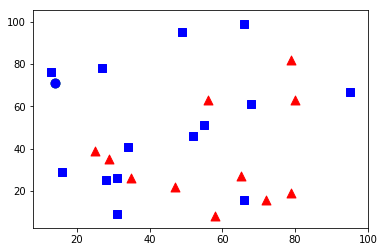

In [92]:
# 10 new comers
newcomers = np.random.randint(0,100,(10,2)).astype(np.float32)
ret, results,neighbours,dist = knn.findNearest(newcomer, 3)
# The results also will contain 10 labels.
plt.scatter(newcomer[:,0],newcomer[:,1],80,'b','o')
plt.show()
